## CS530 Data Mining Homework 4 part 2

#### Question 2 (4 points)

a. Run k-means clustering algorithm using Scikit-learn on the Iris dataset. Create silhouette plots for different k values and find the best k.

In [1]:
## Your code goes here
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fclusterdata

In [2]:
def silhouette_plot(x, y, k, ax=None):
    if ax is None:
        ax = plt.gca()

    silScores = silhouette_score(x, y)
    silValues = silhouette_samples(x, y)

    y_lower = padding = 2
    for j in range(k):
        silVal = silValues[y == j]
        silVal.sort()

        clusterSize = silVal.shape[0]
        y_upper = y_lower + clusterSize
        c_map = cm.get_cmap("Spectral")
        color = c_map(float(j) / k)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0,
                         silVal,
                         facecolor=color,
                         edgecolor=color,
                         alpha=0.7)

        ax.text(-0.1, y_lower + 0.5 * clusterSize, str(j + 1))
        y_lower = y_upper + padding

    ax.set_xlabel("Silhouette Value")
    ax.set_ylabel("Cluster")

    ax.axvline(x=silScores, c='r', ls='-')
    ax.annotate('Average', xytext=(silScores, y_lower * 1.025), xy=(0, 0), ha='center', alpha=0.8, c='r')
    ax.set_yticks([])
    ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    ax.set_ylim(0, y_upper + 1)
    ax.set_xlim(-0.075, 1.0)
    return ax



def plot_data(min_c, max_c, data):
    for c in range(min_c, max_c):
        clusters = KMeans(c, random_state=10)
        clusterFit = clusters.fit_predict(data)
        fig, (ax1) = plt.subplots(1, 1, figsize=(11, 4), dpi=500)
        ax1 = silhouette_plot(data, clusterFit, c, ax=ax1)
        fig.subplots_adjust(top=0.825)
        fig.suptitle("Silhouette Analysis")
        plt.show()
        print(f'{c}, {round(silhouette_score(data, clusterFit), 2)}')

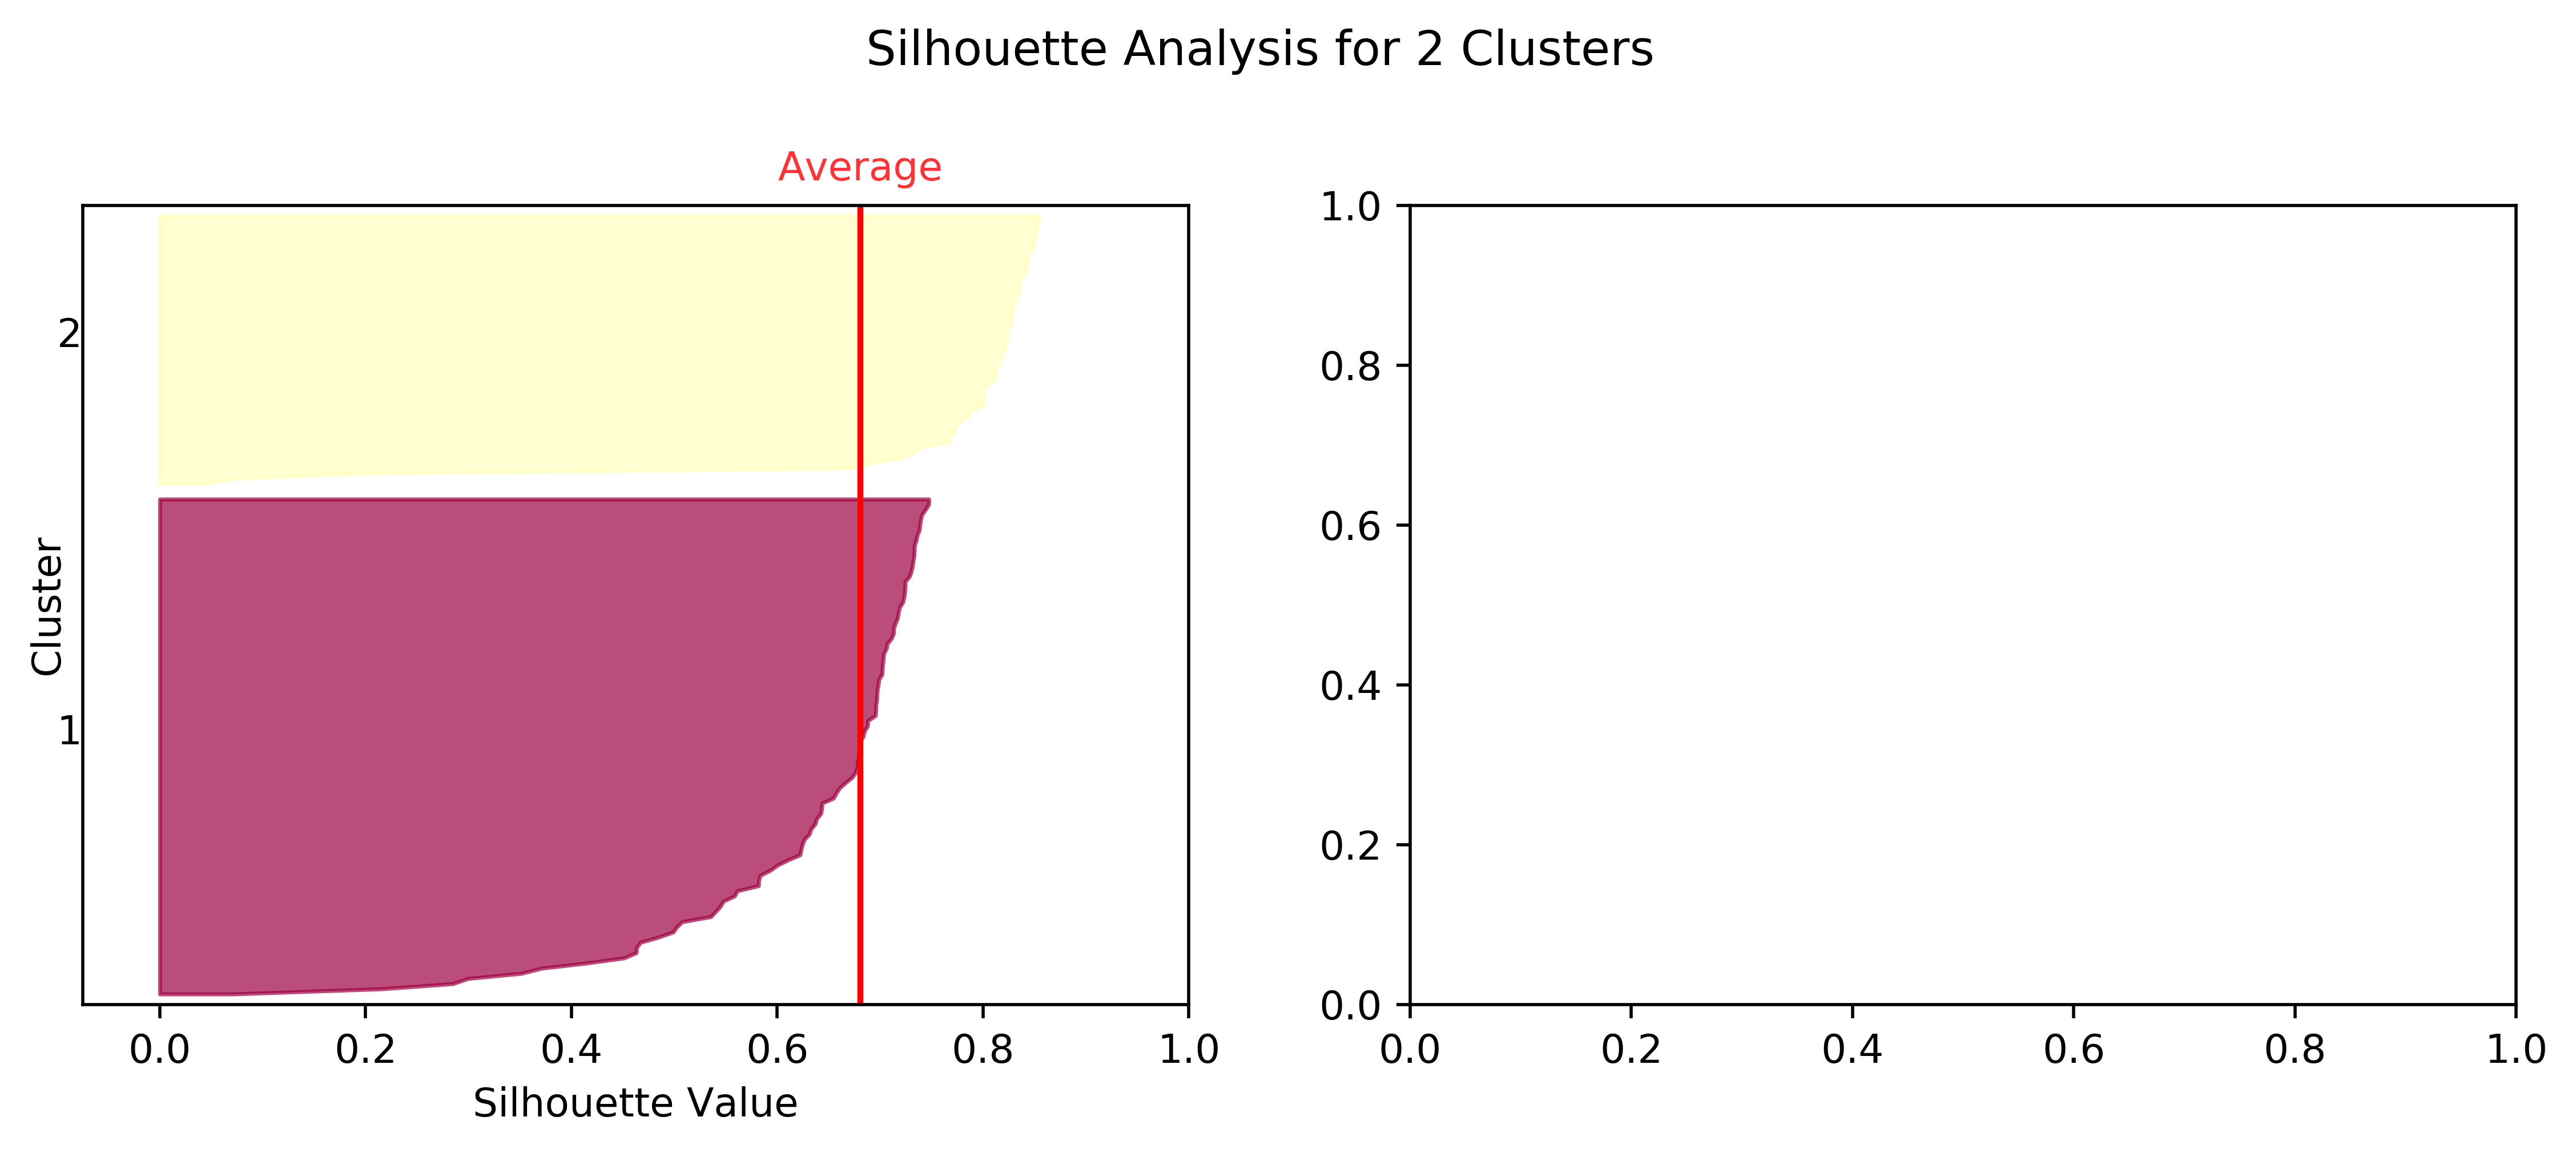

2, 0.68
3, 0.55
4, 0.5
5, 0.49


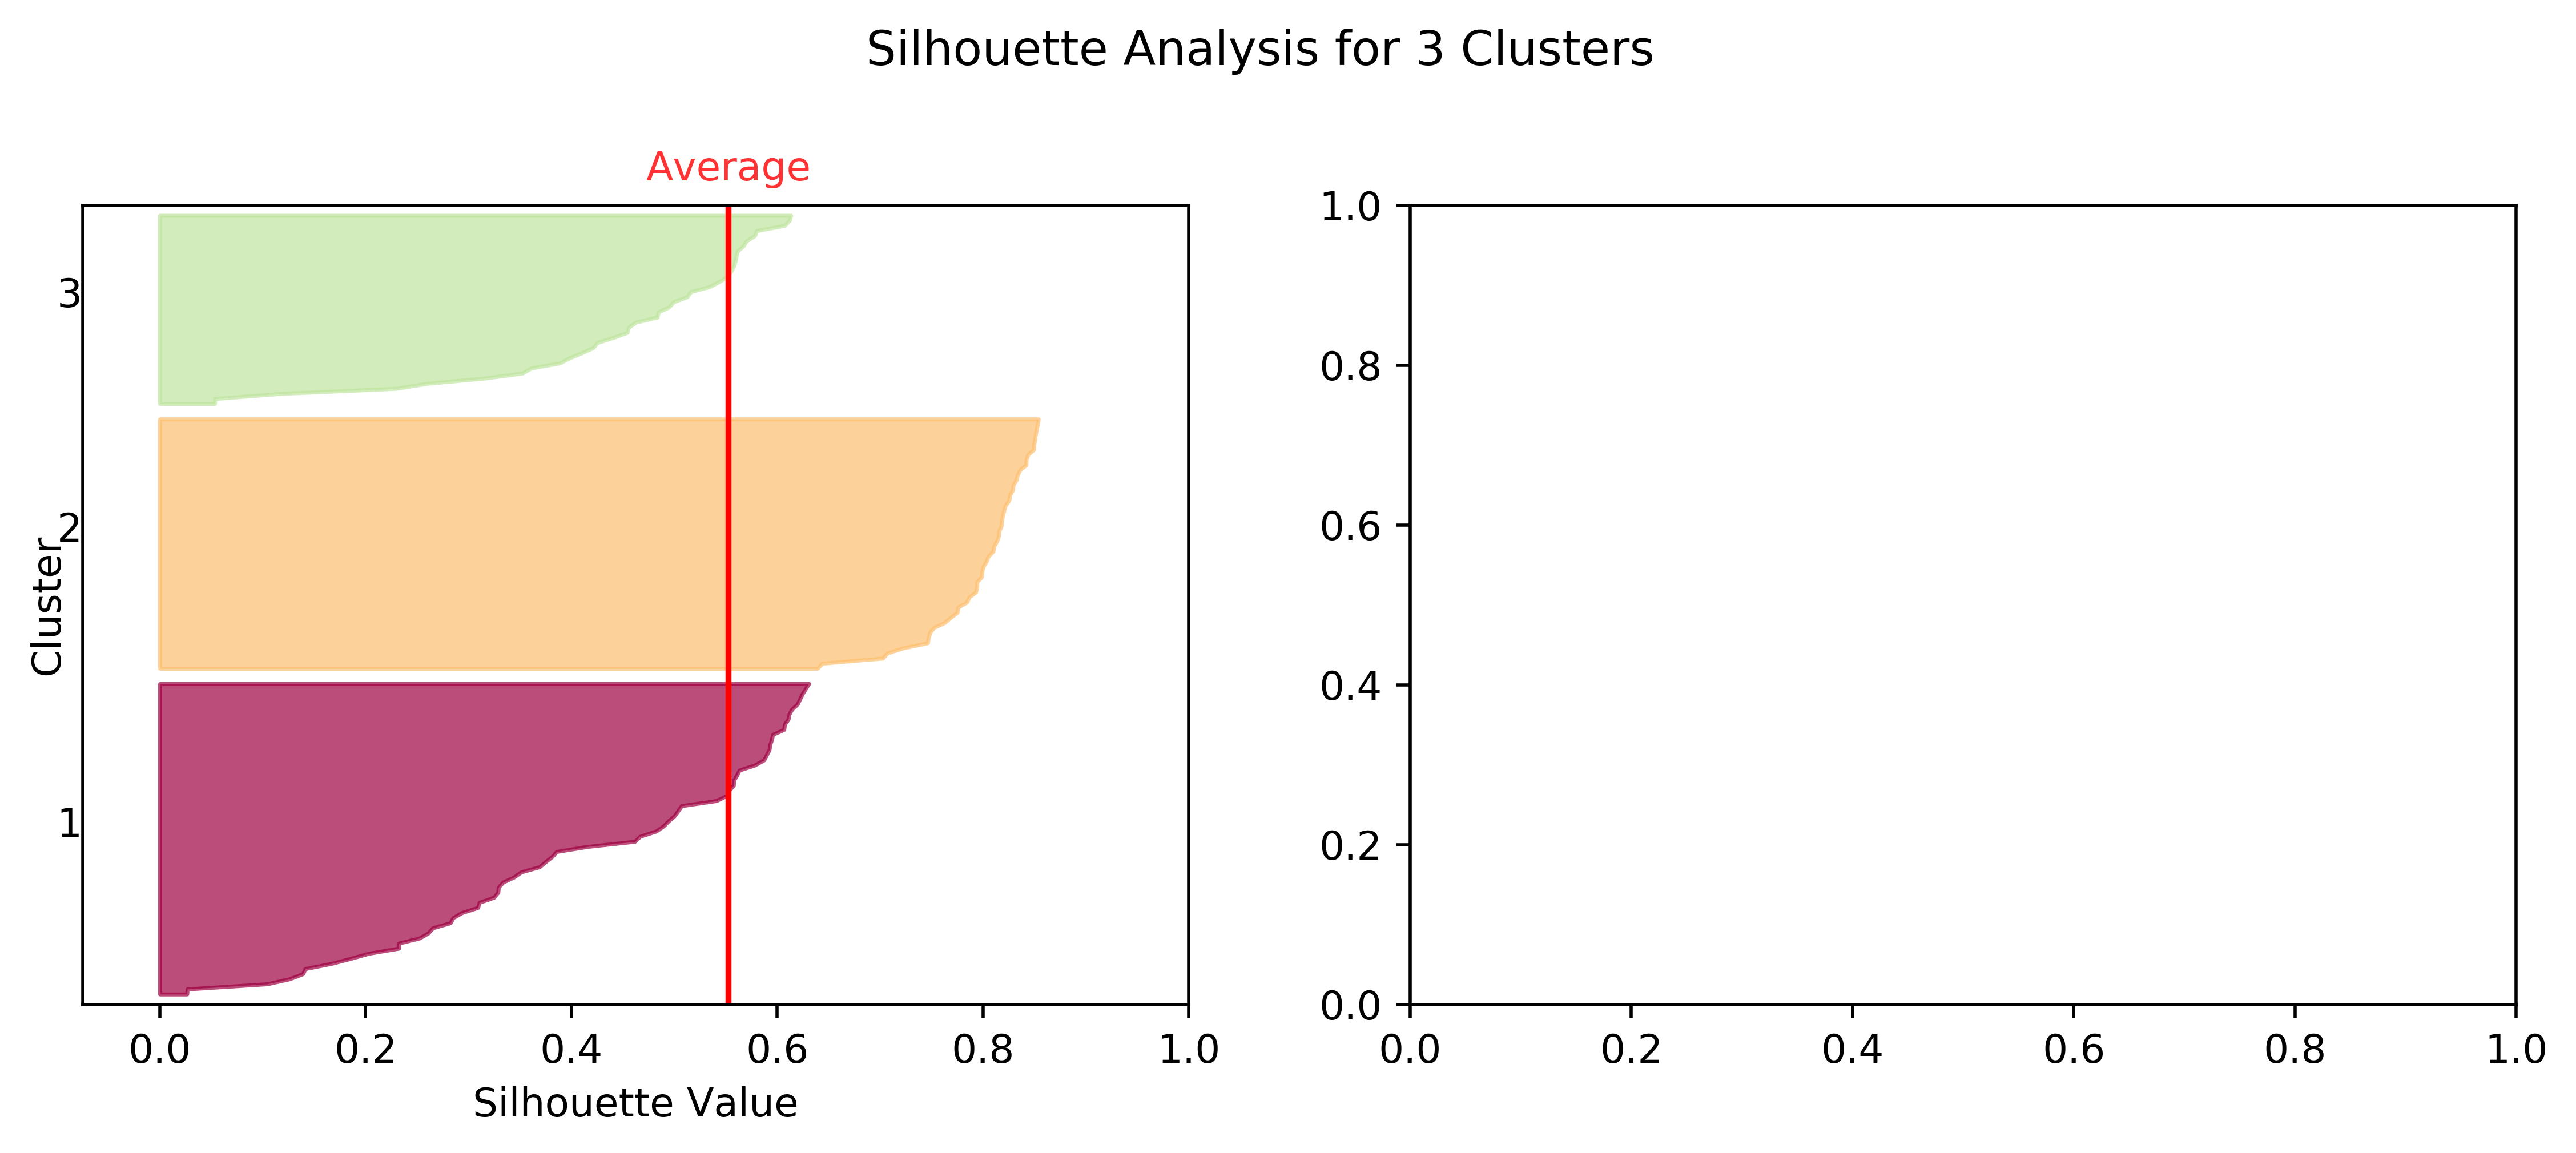

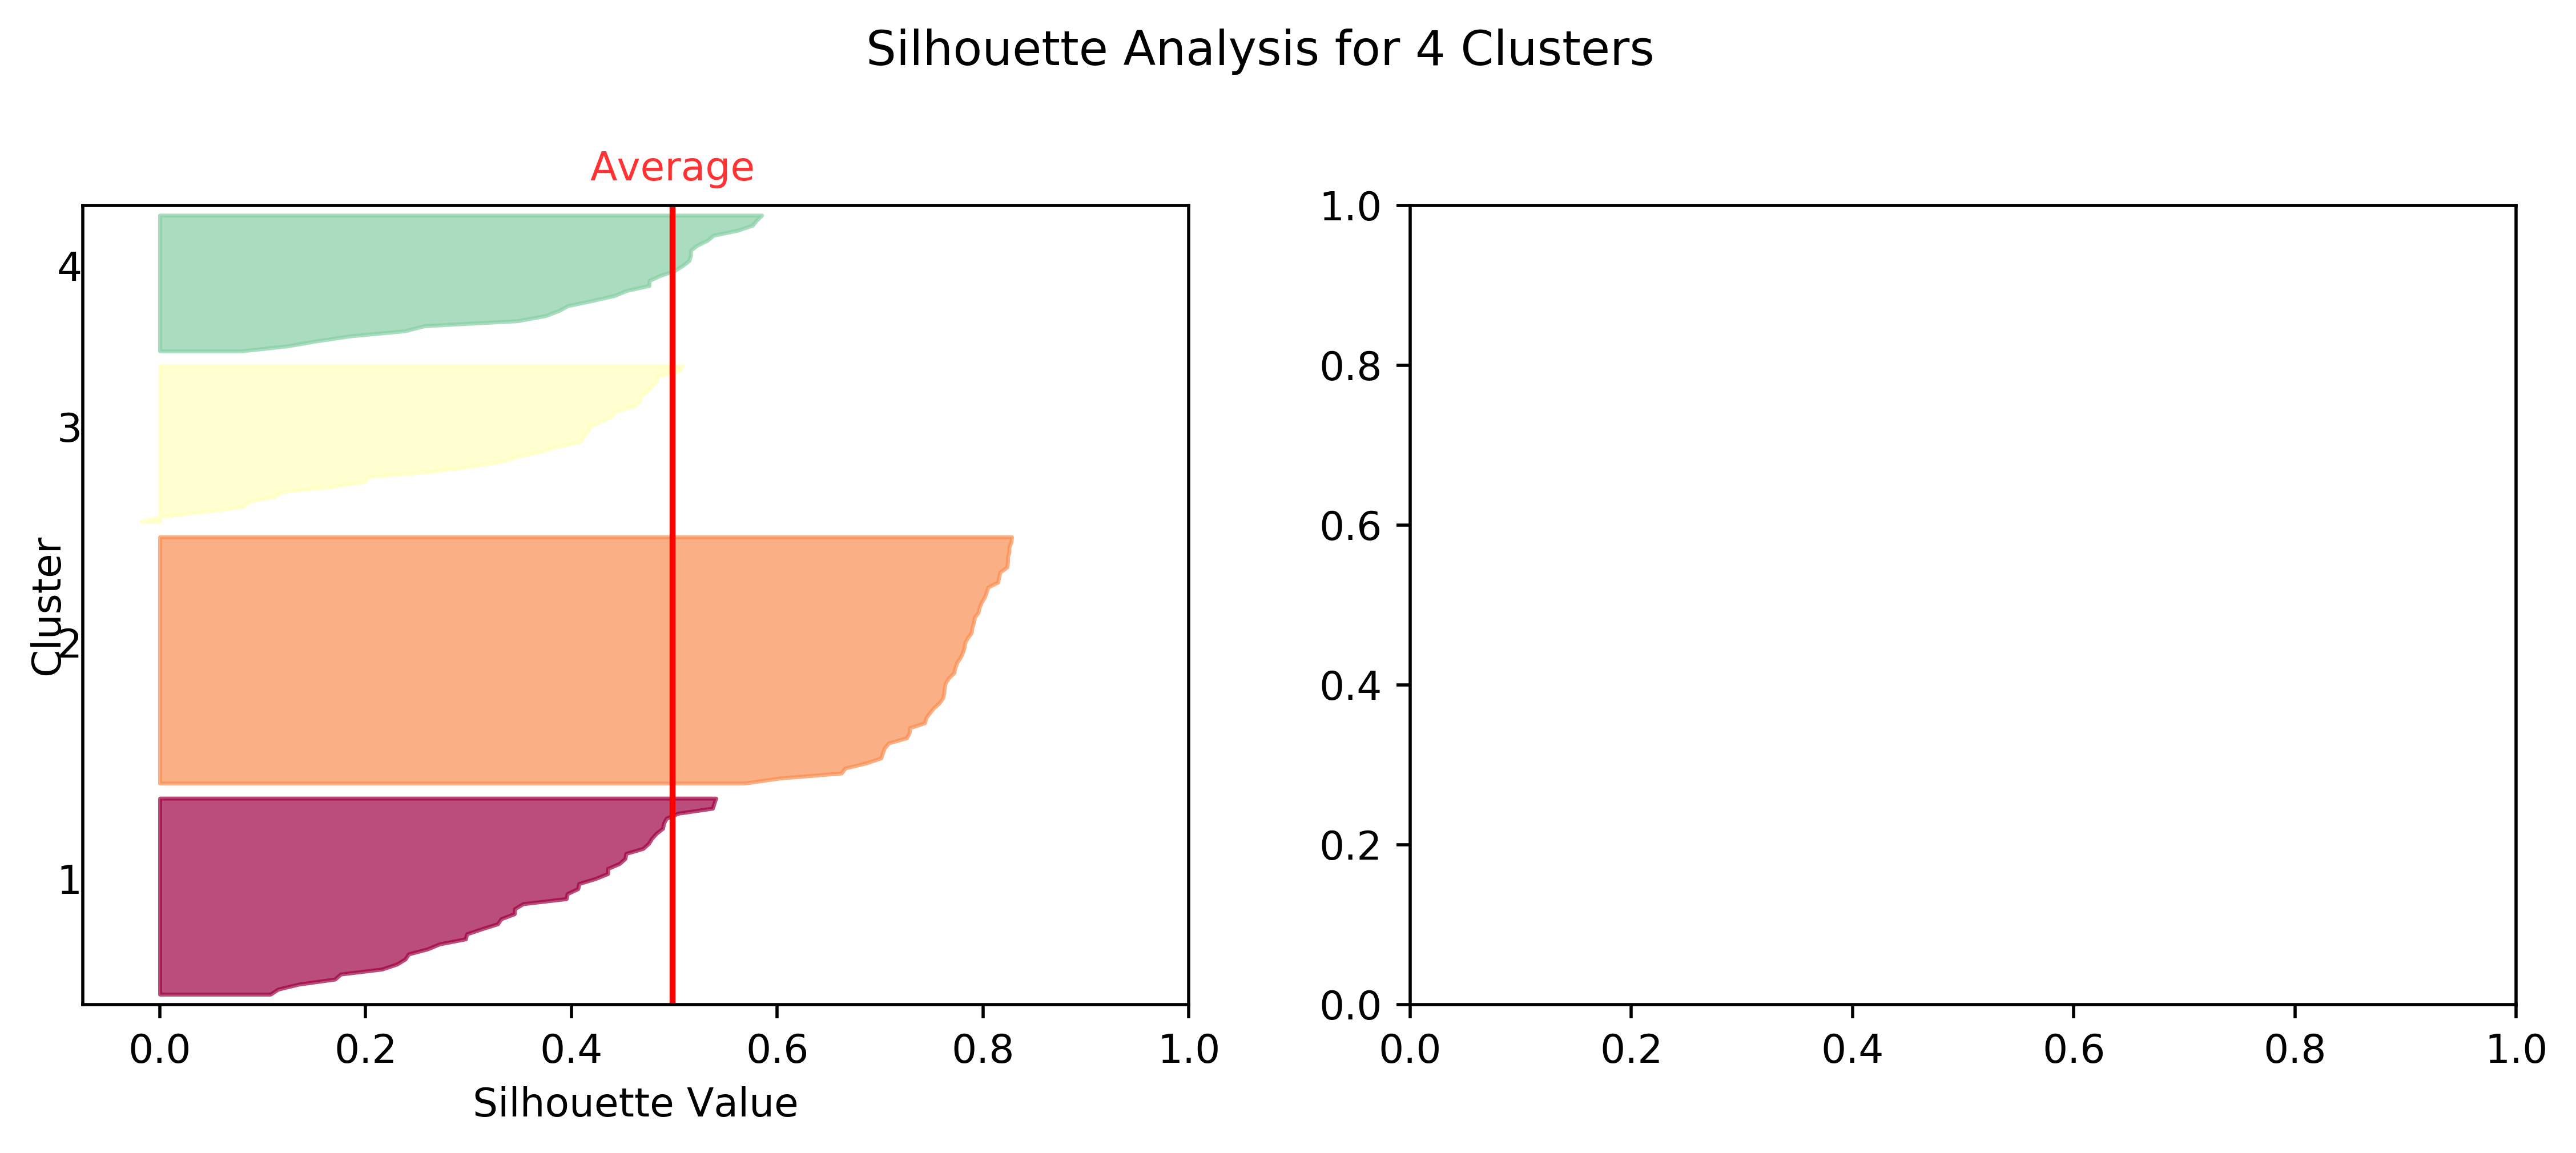

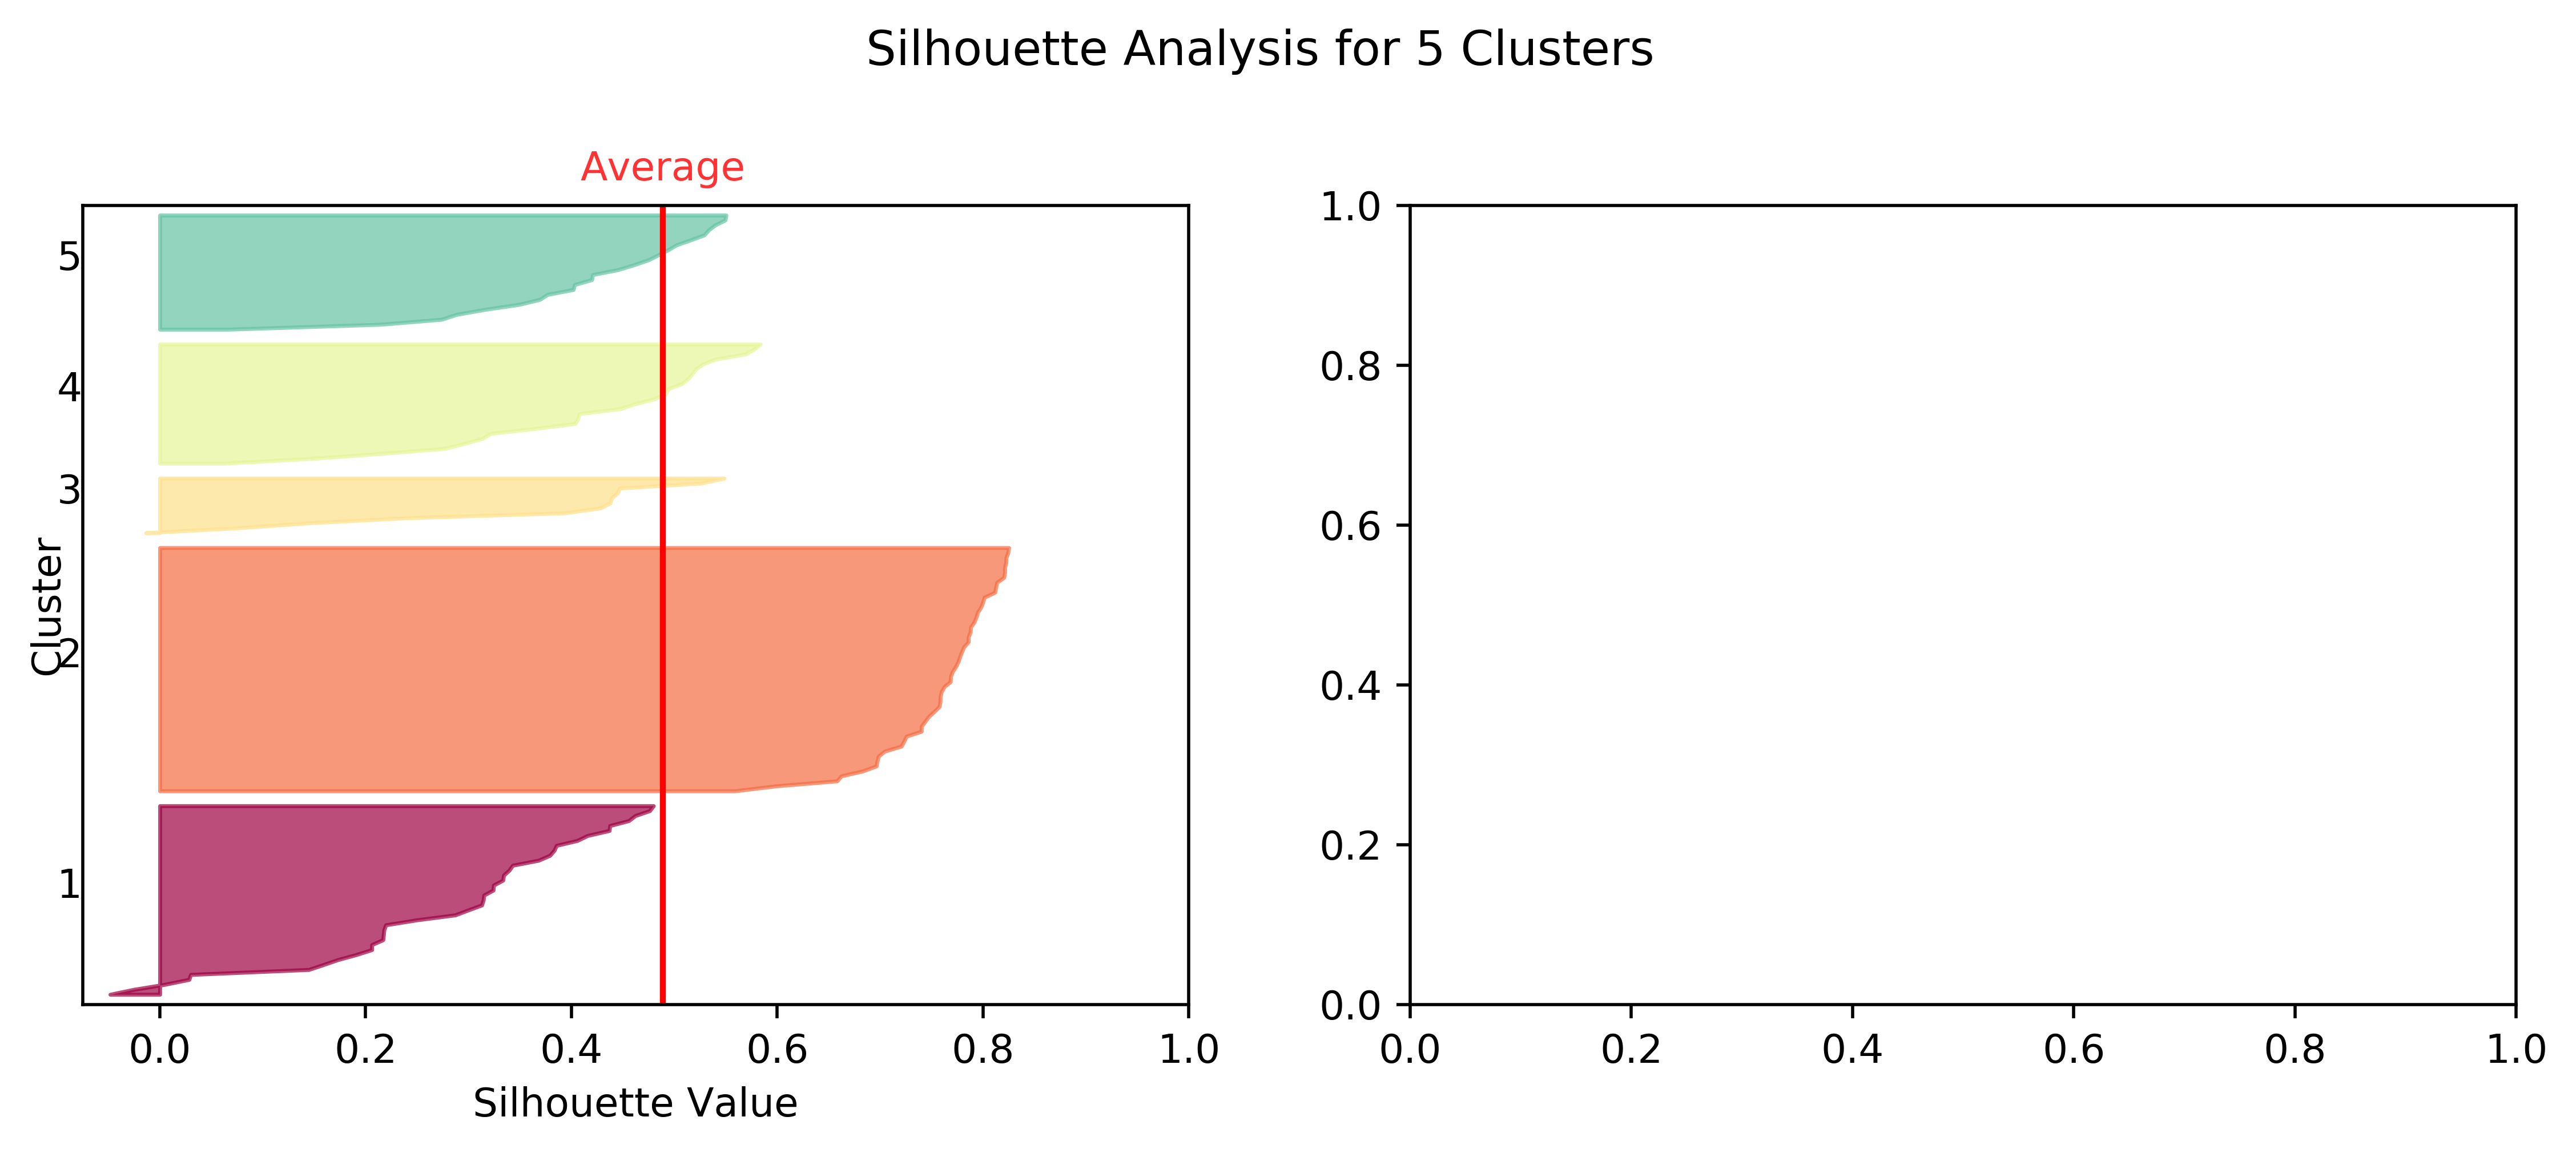

In [16]:
irisData = load_iris().data
plot_data(2, 6, irisData)

Optimal Number of Clusters appears to be 3, possibly 2. 
Anything more than that and you can tell that there are too many clusters based on the shape of the silhouettes

b. Compare your clustering results with the actual labels in the Iris dataset. Is there a difference? Explain what might be the cause of the difference.

In [ ]:
def cluster_data(x, y):
    y = np.asarray(y)
    x = np.asarray(x)
    y_uniques = np.unique(y)
    return [x[y == yi] for yi in y_uniques]


def euclidean_distance(u, v):
    totalDistance = 0
    for i in range(len(u)):
        distance = np.math.sqrt((u[i] - v[i]) ** 2)
        totalDistance += distance
    return totalDistance


def update_cluster_label(centroids, cluster_labels, x):
    for i in range(len(x)):
        distance = [np.linalg.norm(x[i] - centroid) for centroid in centroids]
        label = distance.index(min(distance))
        cluster_labels.append(label)


def update_centroid(centroids, clusters):
    for i in range(len(clusters)):
        centroid = clusters[i].mean(axis=0)
        centroids[i] = centroid


def k_means(x, k=3, max_iterations=1000, tolerance=0.001):
    cluster_labels = []
    currentIterations = 0
    centroids = x[np.random.choice(x.shape[0], k, replace=False), :]

    while True:
        update_cluster_label(centroids, cluster_labels, x)
        clusters = cluster_data(x, cluster_labels)

        previousCentroids = np.array(centroids)
        update_centroid(centroids, clusters)
        currentError = np.sum((centroids - previousCentroids) / previousCentroids * 100, dtype=np.float32)
        if (currentIterations >= max_iterations) or (abs(currentError) <= tolerance):
            print(f'Iterations : {currentIterations}')
            print(f'Current Error : {currentError}')
            print(f'Current Centroids : {centroids}')
            break
        cluster_labels = []
        currentIterations += 1

    return cluster_labels

In [7]:
## Your code goes here
iris = load_iris()
labels = np.asarray(k_means(iris.data))
target = np.asarray(iris.target)
comparison = pd.DataFrame({'K Means Estimate': labels, 'Iris Classification': target})
print(comparison)

Iterations : 9
Current Error : 0.0
Current Centroids : [[5.006      3.428      1.462      0.246     ]
 [6.85384615 3.07692308 5.71538462 2.05384615]
 [5.88360656 2.74098361 4.38852459 1.43442623]]
     K Means Estimate  Iris Classification
0                   0                    0
1                   0                    0
2                   0                    0
3                   0                    0
4                   0                    0
..                ...                  ...
145                 1                    2
146                 2                    2
147                 1                    2
148                 1                    2
149                 2                    2

[150 rows x 2 columns]


There is some variation between how my code is clustering the data and how the official iris classification is clustering.
For the most part, the code is accurately partitioning data in to the appropriate clusters, with the most interplay occuring between
the second and third clusters.

This may be explained by how the centroids are initially determined, or using something other than euclidean distance when assigning a centroid.

There are also going to be some potential differences due to the domain knowledge of the iris creators, knowing the classification prior to any clustering.

#### Question 3 (3 points)

a. Look at the hierarchical clustering documentation for [scipy](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html). Perform hierachical clustering on the Iris dataset using single, complete, average and centroid linkage. Plot their associated dendrogram.

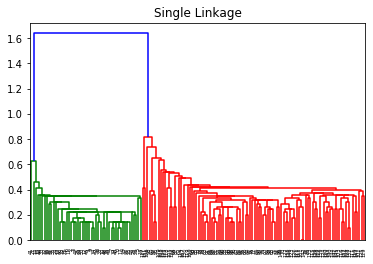

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 13 15 13  9 14 12 15  3 14 21  3 11 27  7 23 14 12 10  5  8 22 18
 22  7 14 14 17 16  7 19  8  8 10 22 12 20 13  5 10  9 10  7 10  3 10 10
 10 14  3 10 24 22 22 22 22  4 32  6 30 31 22 22 22 22 26 22 22  2  4 25
 22 22  4 22 22 22 22 22 22 22  6  2 22 22 29 28 22 22 22 22 22 22 22 22
 22 22 22 22 22 22]
[39 36 42 42 37 48 42 40 43 35 50 53 36 43 47 47 46 39 48 51 49 51 44 52
 53 35 52 38 38 34 34 49 46 46 35 41 50 37 43 40 39 45 42 52 51 36 51 42
 50 40 18 19 18 29 17 23 19 21 17 31 21 24 32 20 28 17 22 25 16 30 11 24
 14 20 20 17 17 18 20 28 30 30 25 14 22 19 18 16 27 29 23 20 25 21 26 27
 27 20 21 26  4 12  1  8  9  1 33  1 10  1  5 13  6 12 12  5  8  1  1 16
  3 12  1 14  3  1 14 11  9  1  1  1  9 14 15  1  4  8 11  6  2  7 12  3
  2  7 13  5  4 11]
[ 7 16 19 19  4  9 20  5 14 17 10 15 16 14  1  1 12  7  9 11  2 11 21  3
 15 17  3  

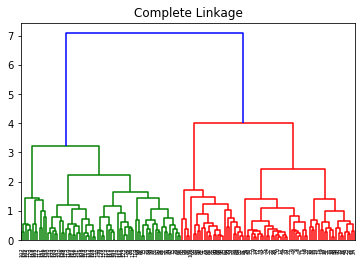

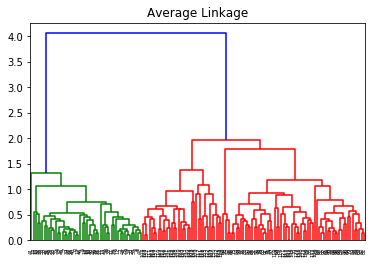

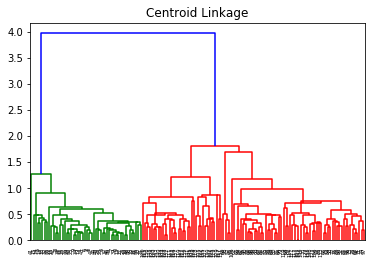

In [6]:
# Your code goes here    iris = load_iris()
iris = load_iris()
links = linkage(iris.data, 'single')
dendrogram(links, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Single Linkage')
plt.show()
print(fclusterdata(iris.data, t=1, method='single'))

links = linkage(iris.data, 'complete')
dendrogram(links, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Complete Linkage')
plt.show()
print(fclusterdata(iris.data, t=1, method='complete'))

links = linkage(iris.data, 'average')
dendrogram(links, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Average Linkage')
plt.show()
print(fclusterdata(iris.data, t=1, method='average'))

links = linkage(iris.data, 'centroid')
dendrogram(links, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Centroid Linkage')

plt.show()
print(fclusterdata(iris.data, t=1, method='centroid'))

b. Look at the dendrograms more closely and explain the difference between each linkage method.

# Your discussion goes here
## Single Linkage
Single linkage works by selecting the two closest points, and working its way up to a single cluster continually searching to combine 
either the 2 closests items (points or clusters). Because of this, the dendrogram looks very much like a standard binary tree in cases
where most points are close together. 

## Complete Linkage
Complete linkage works similarly to the Single Linkage, but instead of working from the closest points upwards, it works on the furthest
points inwards. Because of this, the dendrogram has a more balanced appearance, making it easier to determine the number of clusters at each stage.

## Average Linkage
Average linkage works again looking at minimum distances, but instead of using the minimum distance of a single point, the distance used
is the average distance between each pair-wise distance between the cluster and the target point. This avoids cases where a single point may
be closer to a single point in the cluster, but on average much further away from the other points in the cluster, leading to a bad
match.

## Centroid Linkage
Centroid linkage works using minimum distance, but instead of using the minimum between points it works on the minimum distance from 
the centroid of the cluster to the target point. This typically looks to minimize the euclidean distance between the target point 
and the cluster. 

# Analysis using Average Linkage

c. Choose your linkage method and the number of clusters you would like to keep. Create clustering labels for the Iris dataset and compare with the actual labels. Explain the difference.

In [3]:
# Your code goes here
iris = load_iris()
links = linkage(iris.data, 'average')
labels = fclusterdata(iris.data, method='average', criterion='maxclust', t=3)
target = np.asarray(iris.target)
comparison = pd.DataFrame({'Average Aggregate Estimate': labels-1, 'Iris Classification': target})
print(comparison)

     Average Aggregate Estimate  Iris Classification
0                             0                    0
1                             0                    0
2                             0                    0
3                             0                    0
4                             0                    0
..                          ...                  ...
145                           1                    2
146                           2                    2
147                           1                    2
148                           1                    2
149                           2                    2

[150 rows x 2 columns]


# Your discussion goes here

The accuracy of the Average Aggregate Clustering appaered to be similar to the previous methods of k-means clustering.
We primarily run into issues with the 1 and 2 clusters as they appear to have many datapoints that are close together. The
error seems to have existed for all other clustering methods as well. 